CIENCIA DE DATOS
ACTIVIDAD SEMANA 6 VIZUALIZACIÓN


URL de los datos originales:
https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv
URL de la descripción de los datos originales
https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Monto de Credito = Numerico
Genero = 1-2
Educación = 1-4
Estado civil = 1 – 3
Edad = Numérico
Pagos sept-abri = -1,1-8
Adeudos sept-abr = numerico
Abonos sept-abril = Numerico


In [7]:
#Importamos las librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



 
Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
.

In [8]:
df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
print('El contenido de mi dataset es:-----------------------------------------')
print(df)
print('El tamano de mi data set es:-------------------------------------------')
print(df.shape)
print('El DataSet contiene las siguientes columnas:---------------------------')
print(df.columns)
print('Los encabezados de mi Data Set son:------------------------------------')
print(df.head())
print('Los tipos de datos de las columnas de mi Data Set son:-----------------')
print(df.dtypes)
print('El resumen de datos de mi Data Set son:--------------------------------')
print(df.info())
print('Los datos nulos de mi Data Set son:------------------------------------')
print(df.isna())
print('total de datos nulos de mi Data Set son:-------------------------------')
print(df.isna().sum())

El contenido de mi dataset es:-----------------------------------------
          ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0

In [30]:
#Creamos un nuevo DataSet llamado df_cleaned que contendra los datos limpios e imputaciones
df_cleaned = df.copy()
df_cleaned

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [37]:
#nombre_actual = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
#nuevo_nombre = ['monto_credito','genero','educacion','estado_civil','edad','pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr','deuda_sept','deuda _ago','deuda _jul','deuda _jun','deuda _may','deuda _abr', 'abono_sept','abono _ago','abono _jul','abono _jun','abono _may','abono _abr']

df_cleaned.rename(columns={'X1':'monto_credito','X2':'genero','X3':'educacion','X4':'estado_civil','X5':'edad','X6':'pago_sept','X7':'pago_ago','X8':'pago_jul','X9':'pago_jun','X10':'pago_may','X11':'pago_abr'},inplace=True)
df_cleaned

,ID,monto_credito,genero,educacion,estado_civil,edad,pago_sept,pago_ago,pago_jul,pago_jun,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


#

Limpia los datos eliminando los registros nulos o rellena con la media de la columna


In [54]:
#Primero renombramos las columnas y vemos su valores unicos para hacer la limpieza

#for i,j in nombre_actual,nuevo nombre:
#df.rename(columns={i:j}, inplace=True)
#df.rename(columns={nombre_actual:nuevo_nombre}, inplace=True)

categoricas=['genero','educacion','estado_civil', 'pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr']
numericas= ['monto_credito','edad','deuda_sept','deuda _ago','deuda _jul','deuda _jun','deuda _may','deuda _abr', 'abono_sept','abono _ago','abono _jul','abono _jun','abono _may','abono _abr']

#Si decidimos eliminar los datos nulos
# df_clean= df.dropna()

#PAra rellenarlos usamos el fillna , para Fill NA/NaN values using the specified method.

#valor_promedio = df['columna'].mean()

#df['columna'].fillna(value=valor_promedio, inplace=True)

#Para muchas columnas lo hacemos como ciclo que primero obtenga los pormedios de cada columna y despues los rellene
for columnas in df_cleaned.columns:
  promedio = df_cleaned[columnas].mean() #Recordar que usamos el promedio, porque todos los valores son numericos, si hubiera categoricos o binarios usariamos la media
  df_cleaned[columnas].fillna(value = promedio, inplace=True)
print('total de datos nulos de mi Data Set son:-------------------------------')
print(df_cleaned.isna().sum())
df_cleaned

total de datos nulos de mi Data Set son:-------------------------------
ID               0
monto_credito    0
genero           0
educacion        0
estado_civil     0
edad             0
pago_sept        0
pago_ago         0
pago_jul         0
pago_jun         0
pago_may         0
pago_abr         0
X12              0
X13              0
X14              0
X15              0
X16              0
X17              0
X18              0
X19              0
X20              0
X21              0
X22              0
X23              0
Y                0
dtype: int64


,ID,monto_credito,genero,educacion,estado_civil,edad,pago_sept,pago_ago,pago_jul,pago_jun,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión


In [35]:
print('Los datos descriptivos del DataSet son:--------------------------------')
print(df_cleaned.describe())
df_cleaned.describe()
#Mi primer observacion es que los valores estan muy dispersos, es decir, se observan desde valores peque;os 1 y 0, hata valores de 30,000 y 100,000
#

Los datos descriptivos del DataSet son:--------------------------------
                 ID              X1            X2            X3            X4  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603753      1.853057      1.551903   
std     8660.398374   129747.661567      0.489117      0.790293      0.521950   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.484214     -0.016635     -0

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Realiza el conteo de las variables categóricas


In [42]:
#categoricas=['genero','educacion','estado_civil','pago_sept','pago_ago','pago_jul','pago_jun','pago_may','pago_abr']

print("sumatoria de:"+str(df_cleaned['genero'].value_counts())) #Aqui poner las X1, o la X que corresponda si no has renombrado tu columna
print("sumatoria de:"+str(df_cleaned['educacion'].value_counts()))
print("sumatoria de:"+str(df_cleaned['estado_civil'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_sept'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_ago'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_jul'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_jun'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_may'].value_counts()))
print("sumatoria de:"+str(df_cleaned['pago_abr'].value_counts()))

sumatoria de:2.000000    18112
1.000000    11887
1.603753        1
Name: genero, dtype: int64
sumatoria de:2.000000    14030
1.000000    10585
3.000000     4915
5.000000      280
4.000000      123
6.000000       51
0.000000       14
1.853057        2
Name: educacion, dtype: int64
sumatoria de:2.000000    15964
1.000000    13657
3.000000      323
0.000000       54
1.551903        2
Name: estado_civil, dtype: int64
sumatoria de: 0.000000    14736
-1.000000     5684
 1.000000     3688
-2.000000     2759
 2.000000     2667
 3.000000      322
 4.000000       76
 5.000000       26
 8.000000       19
 6.000000       11
 7.000000        9
-0.016635        3
Name: pago_sept, dtype: int64
sumatoria de: 0.000000    15728
-1.000000     6047
 2.000000     3927
-2.000000     3782
 3.000000      326
 4.000000       99
 1.000000       28
 5.000000       25
 7.000000       20
 6.000000       12
-0.133689        5
 8.000000        1
Name: pago_ago, dtype: int64
sumatoria de: 0.000000    15761
-1.000000 

Escala los datos, si consideras necesario


In [44]:
X = df_cleaned.loc[:, df.columns != 'Y'].values #Seleccionamos las X, separando todas las columnas, excepto la columna Y


Y = df_cleaned['Y'].values #Seleccionamos las columnas en y


X_escalada = StandardScaler().fit_transform(X) #Aqui nos cambia los encabezados de nuestras columnas

#Ahora tenemos que meter a un dataframe lo escalado
df_escalado = pd.DataFrame(X_escalada) #esto nos convierte a formato dataframe

df_escalado

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.731993,-1.136720,0.810140,0.185938,-1.057405,-1.245968,1.794552,1.782331,-0.697050,-0.666577,...,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-1.731878,-0.365981,0.810140,0.185938,0.858519,-1.028980,-0.875071,1.782331,0.139148,0.188886,...,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-1.731762,-0.597202,0.810140,0.185938,0.858519,-0.161028,0.014803,0.111674,0.139148,0.188886,...,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-1.731647,-0.905498,0.810140,0.185938,-1.057405,0.164454,0.014803,0.111674,0.139148,0.188886,...,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-1.731531,-0.905498,-1.234395,0.185938,-1.057405,2.334333,-0.875071,0.111674,-0.697050,0.188886,...,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234395,1.451312,-1.057405,0.381442,0.014803,0.111674,0.139148,0.188886,...,2.326634,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174
29996,1.731647,-0.134759,-1.234395,1.451312,0.858519,0.815417,-0.875071,-0.723654,-0.697050,-0.666577,...,-0.627638,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426
29997,1.731762,-1.059646,-1.234395,0.185938,0.858519,0.164454,3.574301,2.617659,1.811545,-0.666577,...,-0.638367,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044
29998,1.731878,-0.674276,-1.234395,1.451312,-1.057405,0.598430,0.904677,-0.723654,0.139148,0.188886,...,0.422219,0.147654,-0.468312,0.168981,4.844741,-0.109091,-0.229903,-0.185199,3.152532,-0.191947


Reduce las dimensiones con PCA, si consideras necesario.


In [47]:
mi_pca = PCA(n_components = 8) #Aqui ponemos la cantidad de vecotores o componentes que nos de la mayoria, en este caso a el 10 le dieron el 80%
componentes_principales = mi_pca.fit_transform(X_escalada)
 
print('Forma antes de PCA: ', X_escalada.shape)
print('Forma despues de aplicar el  PCA: ', componentes_principales.shape)
 
#Hacemos un nuevo dataframe que ponemos el orden de las columnas que deseemos, porque el pca, queda sin encabezado
df_con_pca = pd.DataFrame( data=componentes_principales, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Las etiquetas de nuestas variables objetivo osea las y, las ponemos a gusto
target_names = {0.0:'Mal Cliente',1.0:'Buen Cliente'}
 
df_con_pca['Y'] = Y #aqui estamos a;adiendo la columna de y a nuestro dataframe que contiene el PCA 

df_con_pca['Y'] = df_con_pca['Y'].map(target_names) #Y aqui sustituimos la columna y, con 
 
df_con_pca.head()

print(mi_pca.explained_variance_ratio_) 

mi_pca.explained_variance_ratio_.sum()
df_con_pca

Forma antes de PCA:  (30000, 24)
Forma despues de aplicar el  PCA:  (30000, 8)
[0.27262814 0.1708037  0.06470636 0.06140222 0.04366079 0.04106467
 0.03956632 0.03780476]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Y
0,-1.899818,-0.945015,-0.378329,-0.641704,-0.188657,-1.782906,0.928262,-0.494097,No ladron
1,-0.776971,-2.148720,1.199168,-0.547094,-0.195532,-1.635711,0.528602,0.170728,No ladron
2,-0.859296,-1.111687,0.517334,-0.515456,-0.315942,-1.583646,0.806077,-0.029949,Ladron
3,-0.208203,-0.848398,-0.723990,0.181049,-0.318621,-1.877788,0.598002,0.360615,Ladron
4,-0.852356,-0.111285,-0.943355,2.200423,-1.859650,-0.426806,1.286360,0.837887,Ladron
...,...,...,...,...,...,...,...,...,...
29995,2.534863,0.731417,-1.764403,0.556437,0.627643,1.909357,0.593136,-0.361463,Ladron
29996,-1.764310,-0.010410,-0.529501,0.616342,0.622517,2.313918,0.649539,-0.333305,Ladron
29997,0.367650,-3.273787,0.497116,0.581620,0.118656,2.288252,-0.270798,-0.774204,No ladron
29998,0.661877,0.762093,0.369860,2.982168,0.697010,1.619411,1.033426,-1.827626,No ladron


Indica la varianza de los datos explicada por cada componente seleccionado. 

In [48]:
#Variabza usamo el atributo explained_variance_
mi_pca.explained_variance_

array([6.54329339, 4.09942544, 1.55300449, 1.47370235, 1.04789389,
       0.98558499, 0.94962327, 0.90734444])

Para actividades de exploración de los datos la varianza > 70%


In [50]:
mi_pca.explained_variance_ratio_.sum()
#Encontramos  que en solo 8 vectores, encotrramos el 73% de los valores


0.731636955286074

Indica la importancia de las variables en cada componente
Elabora los histogramas de los atributos para visualizar su distribución
Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones

In [ ]:
#df_escalado.columns.to_list()
df_escalado.columns

IndexError: ignored

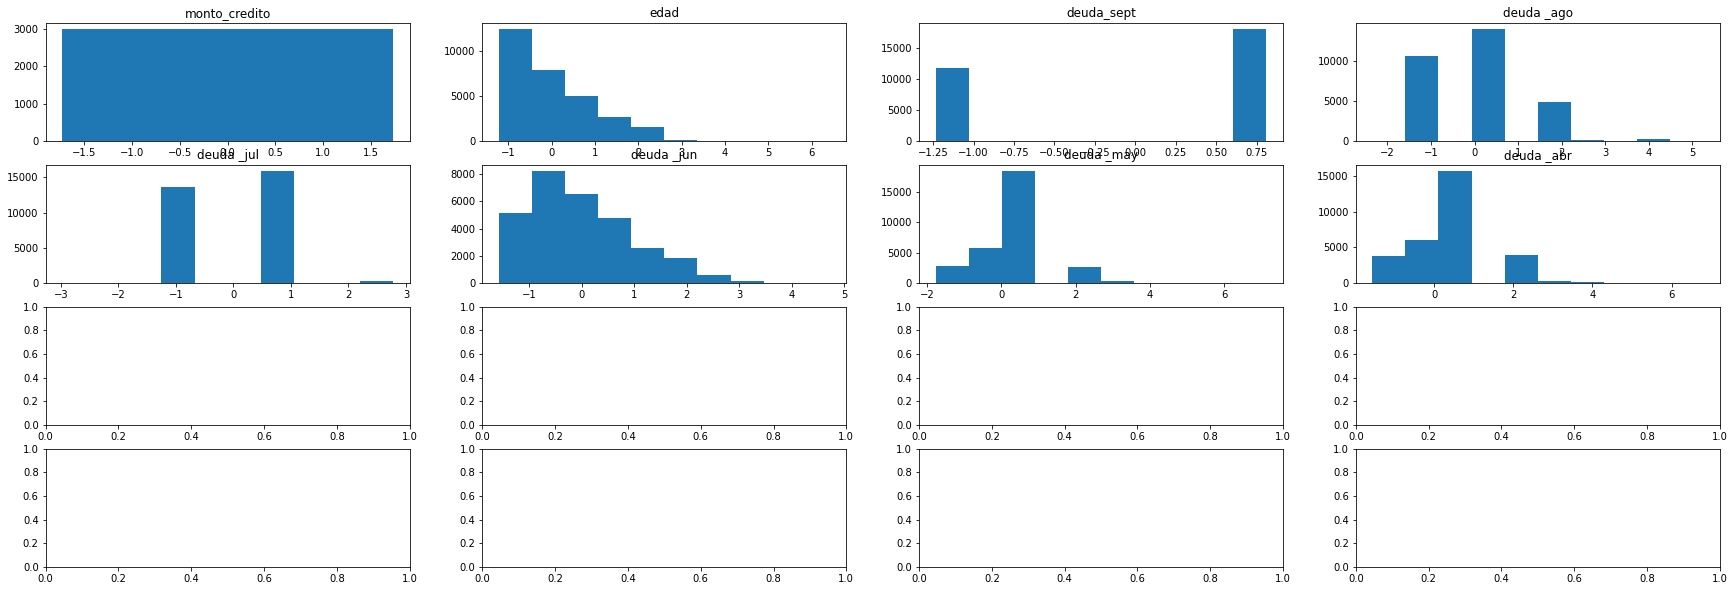

In [58]:
#Hacemos los histogramas, aqui hay dos creencias, una son los datos de los df antes del pca y otros despues del PCa

lista_de_numericas = numericas

grafica_df = df_escalado[[0,1,2,3,4,5,6,7]]
fig, axs = plt.subplots(4, 4, figsize=(30,10)) 

for i in range(len(lista_de_numericas)):
    plt.subplot(4,4,i+1)
    plot_1 = grafica_df[grafica_df.columns[i]]
    plt.hist(plot_1)
    plt.title(lista_de_numericas [i])
    
plt.show()


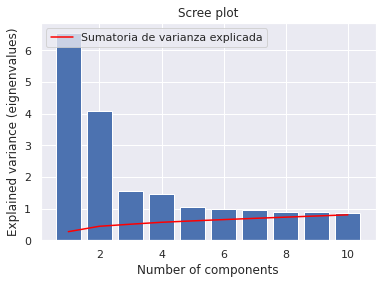

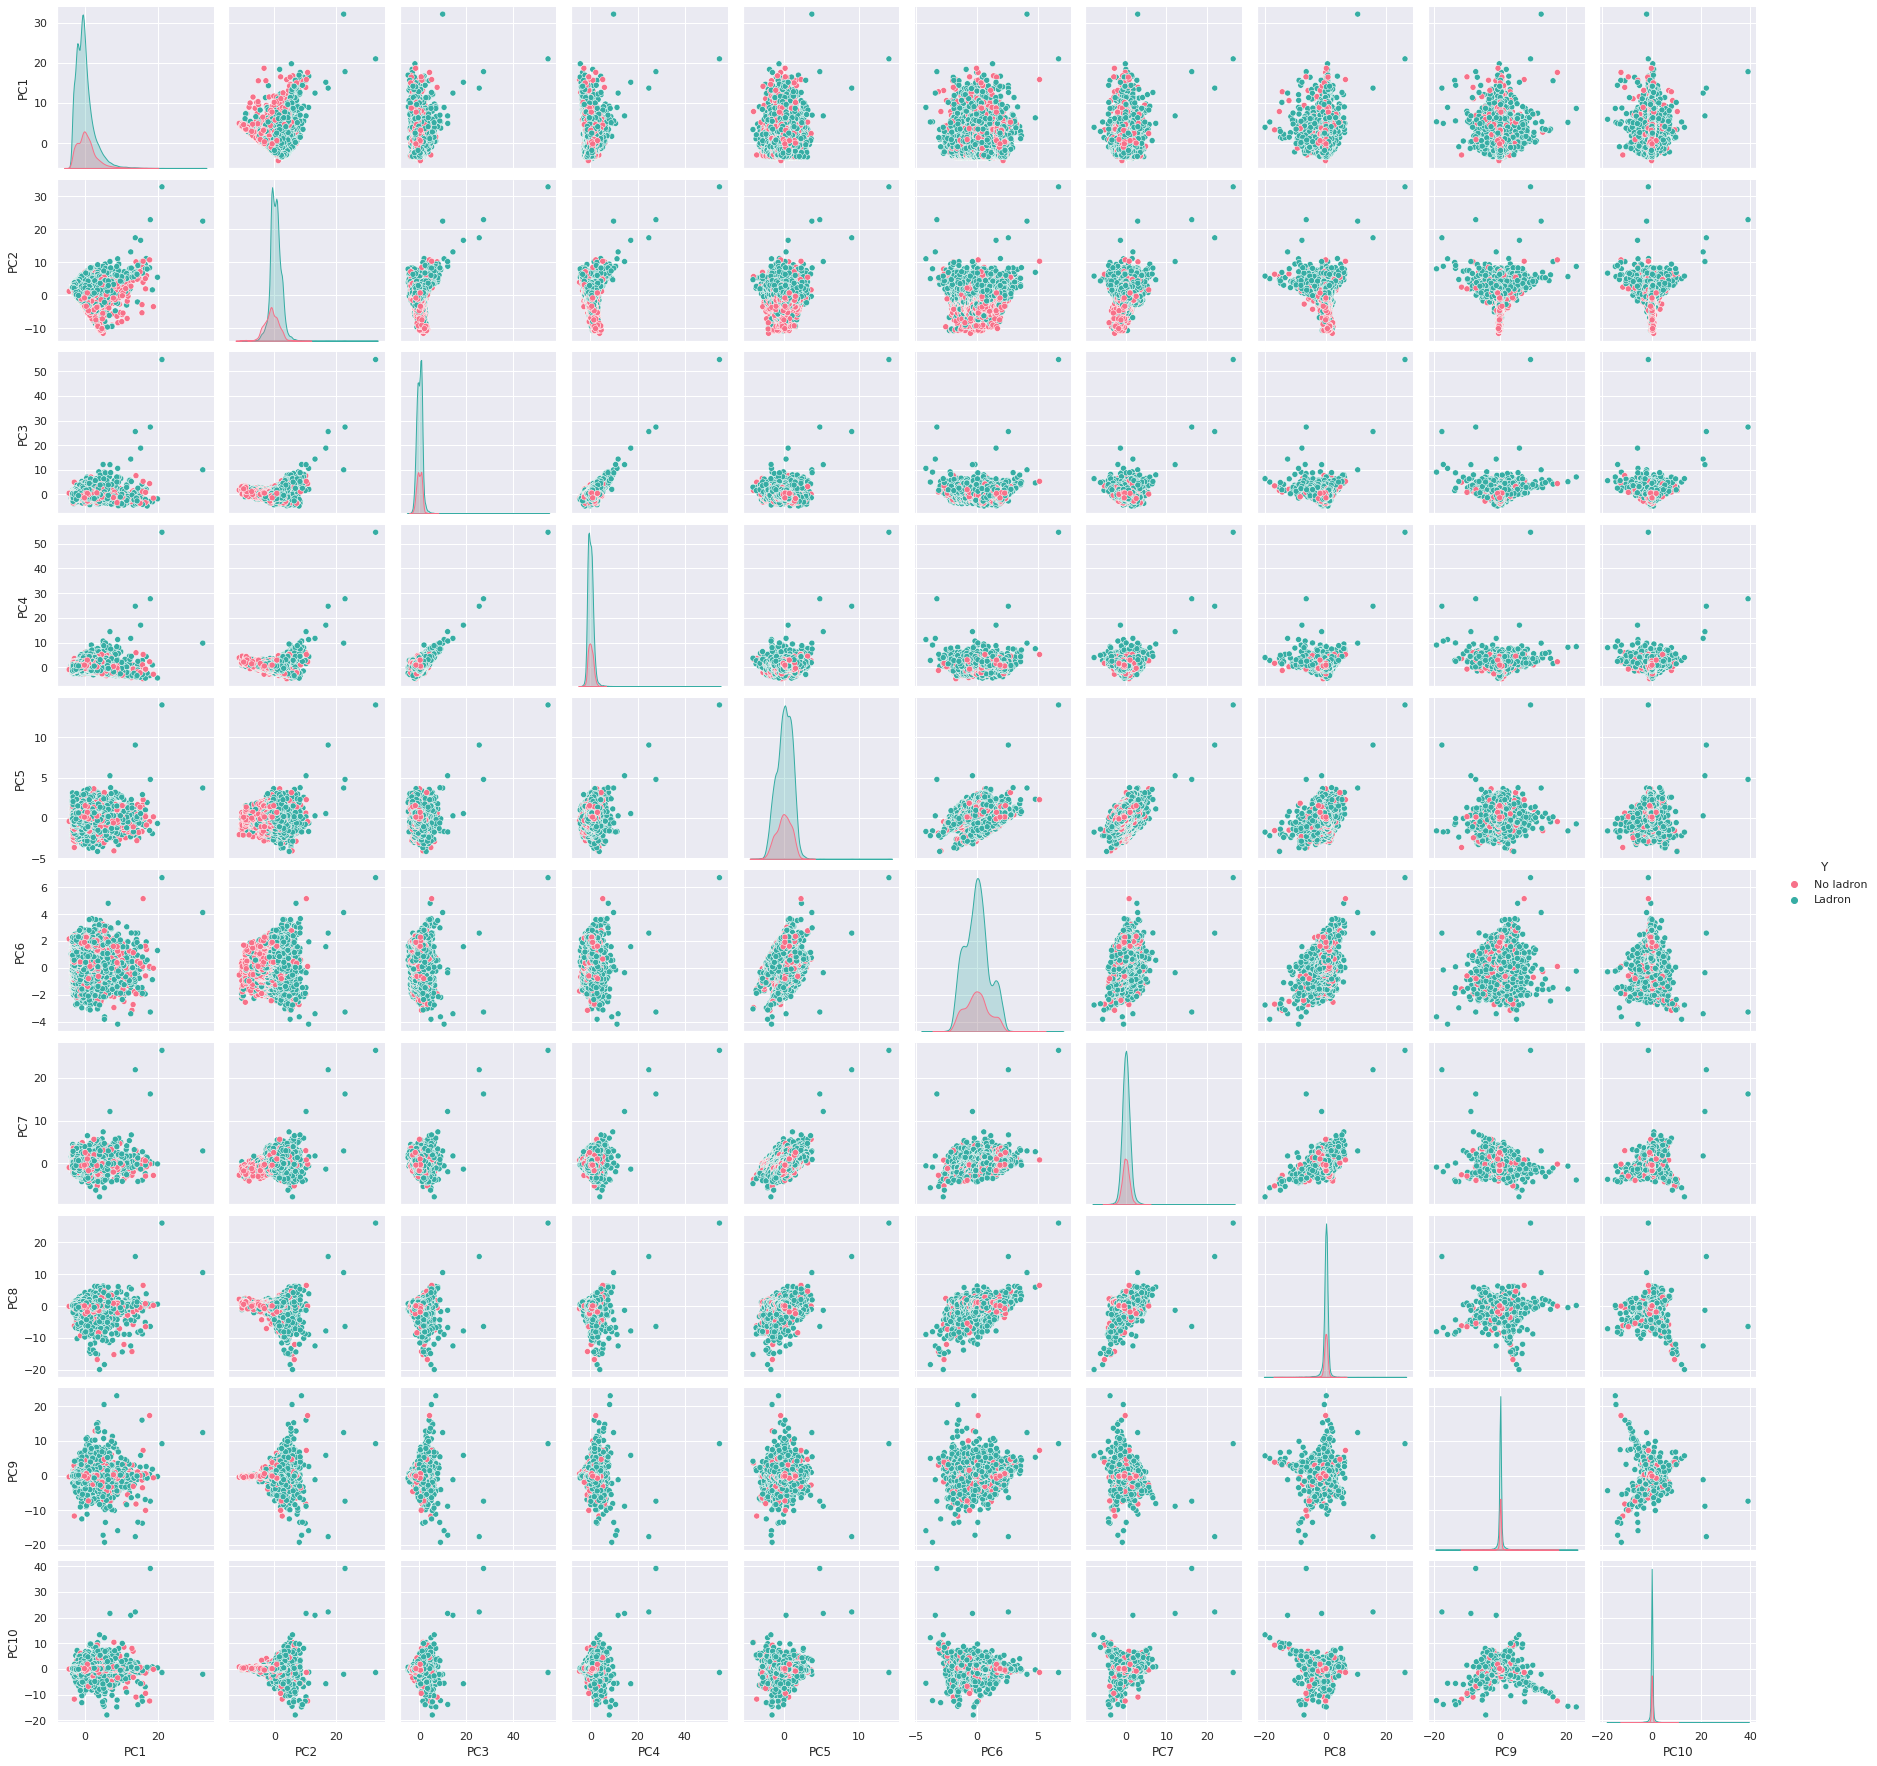

In [ ]:
sns.set() 
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(mi_pca.explained_variance_)+1),
    mi_pca.explained_variance_
    )
 
plt.plot(
    range(1,len(mi_pca.explained_variance_)+1),
    np.cumsum(mi_pca.explained_variance_),
    c='red',
    label='Sumatoria de varianza explicada')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

# La oopcion del pairplot
#sns.pairplot(df_con_pca,hue = 'Y',diag_kind = "kde",kind = "scatter",palette = "husl") #Este pairplot dura como media hora ojo


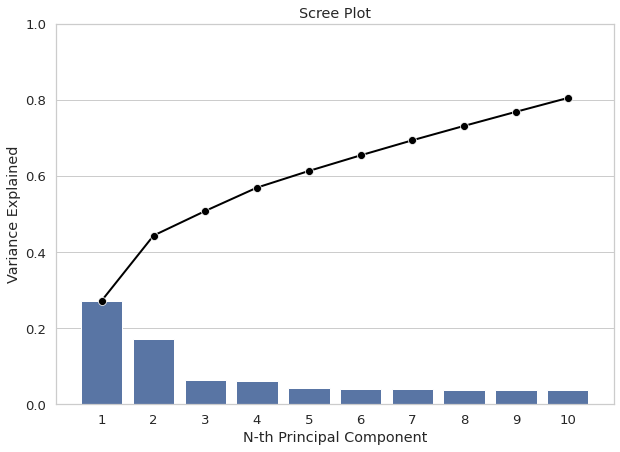

(0.0, 1.0)

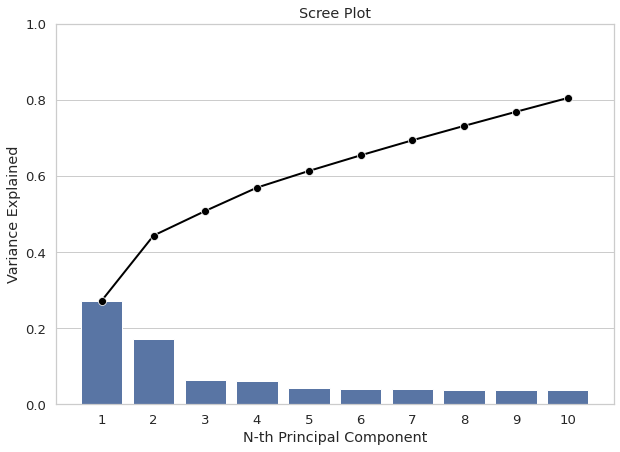

In [ ]:
#Esta es la opcion 3
PC_components = np.arange(mi_pca.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = mi_pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(mi_pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0,1)
plt.show()

#GRÁFICO 3

PC_components = np.arange(mi_pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = mi_pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(mi_pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)


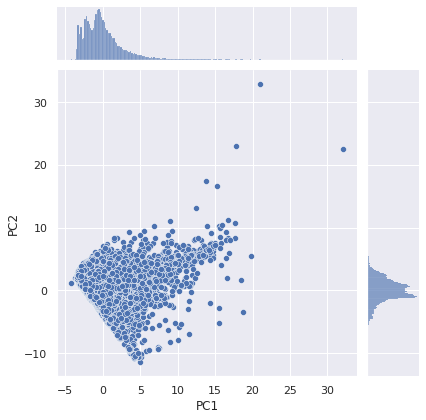

In [ ]:
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.jointplot(x = "PC1", y = "PC2", kind = "scatter", data = df_con_pca)
plt.show()


ValueError: ignored

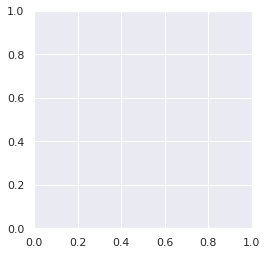

In [ ]:
#Pie chart
mylabels = ['1','2','3','4','5','6','7','8','9','10','11','12']
plt.pie(df_con_pca, labels = mylabels)
plt.show() 

In [ ]:
df_con_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Y
0,-1.899819,-0.945019,-0.378366,-0.641519,-0.188392,-1.783362,0.927359,-0.494809,0.220490,-0.253966,No ladron
1,-0.776972,-2.148734,1.199100,-0.546529,-0.194729,-1.637942,0.525050,0.168721,0.188218,-0.207664,No ladron
2,-0.859296,-1.111687,0.517333,-0.515439,-0.315916,-1.583677,0.806037,-0.030012,0.010678,-0.212880,Ladron
3,-0.208204,-0.848400,-0.723996,0.181109,-0.318532,-1.878023,0.597674,0.360408,0.055782,0.051951,Ladron
4,-0.852356,-0.111290,-0.943386,2.200658,-1.859324,-0.427648,1.284933,0.837011,0.254926,0.536023,Ladron
...,...,...,...,...,...,...,...,...,...,...,...
29995,2.534862,0.731402,-1.764461,0.557042,0.628466,1.906684,0.589019,-0.363420,-0.710709,0.321456,Ladron
29996,-1.764310,-0.010414,-0.529504,0.616481,0.622691,2.313206,0.648457,-0.333721,0.128828,-0.065634,Ladron
29997,0.367650,-3.273787,0.497145,0.581564,0.118537,2.288209,-0.270628,-0.773771,0.544752,-0.425606,No ladron
29998,0.661877,0.762099,0.369882,2.981909,0.696633,1.620473,1.034976,-1.826713,-0.755586,1.832730,No ladron


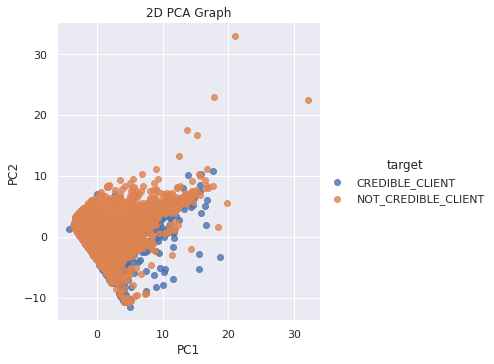

In [ ]:
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
columnas_pca = pca.fit_transform(X_escalada)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=columnas_pca, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0.0:'NOT_CREDIBLE_CLIENT',
    1.0:'CREDIBLE_CLIENT'
}
 
pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)
 
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()


Indica la importancia de las variables en cada componente
Consderando que los pri ero 8 elemtnos del PCA contiene l ainformaci[on principal, puedo observar que las variables categoricas


Conclusion


Explciacion
